# Importing necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015,5/12/2014,6/27/2014,1/15/2015,4/15/2015,3/12/2015,...,8/25/2014,1/26/2015,10/14/2014,3/26/2015,2/19/2015,5/21/2014,2/23/2015,6/23/2014,1/16/2015,10/15/2014
price,221900.0,538000.0,180000.0,604000.0,510000.0,1230000.0,257500.0,291850.0,229500.0,323000.0,...,507250.0,429000.0,610685.0,1010000.0,475000.0,360000.0,400000.0,402101.0,400000.0,325000.0
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1.0,2.25,1.0,3.0,2.0,4.5,2.25,1.5,1.0,2.5,...,2.5,2.0,2.5,3.5,2.5,2.5,2.5,0.75,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


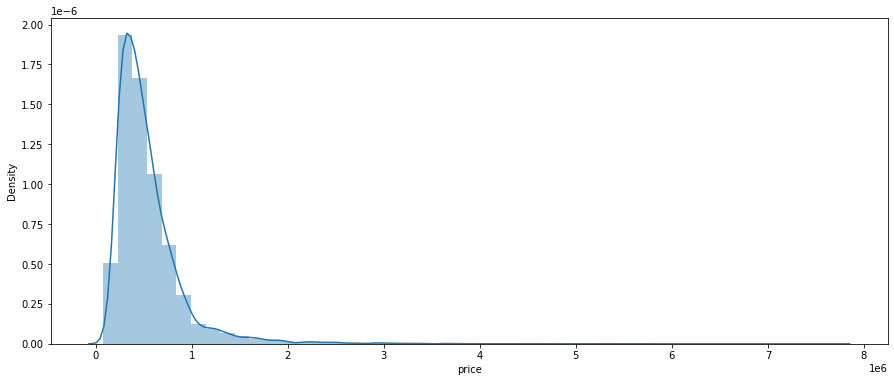

In [5]:
plt.figure(figsize=(15, 6))
sns.distplot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


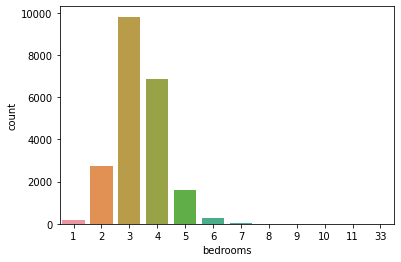

In [6]:
sns.countplot(df['bedrooms'])

In [7]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


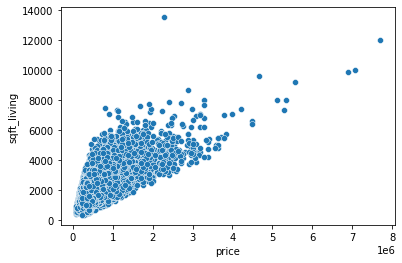

In [8]:
sns.scatterplot('price', 'sqft_living', data=df)

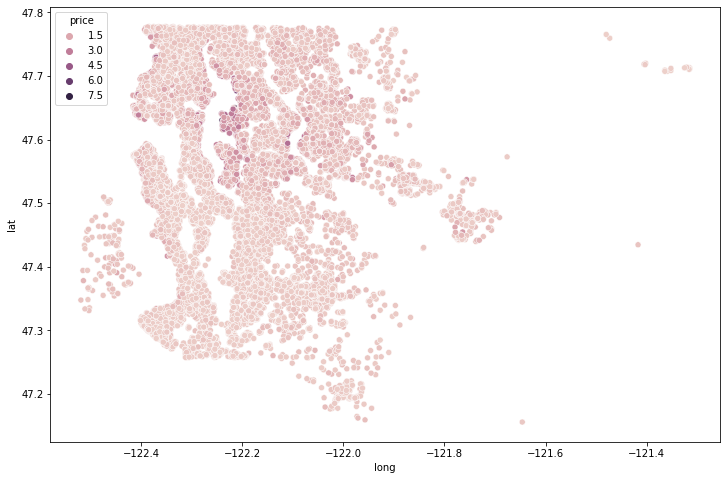

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [10]:
df_noOutliers=df.sort_values('price', ascending=False).iloc[int(len(df)*0.01):]

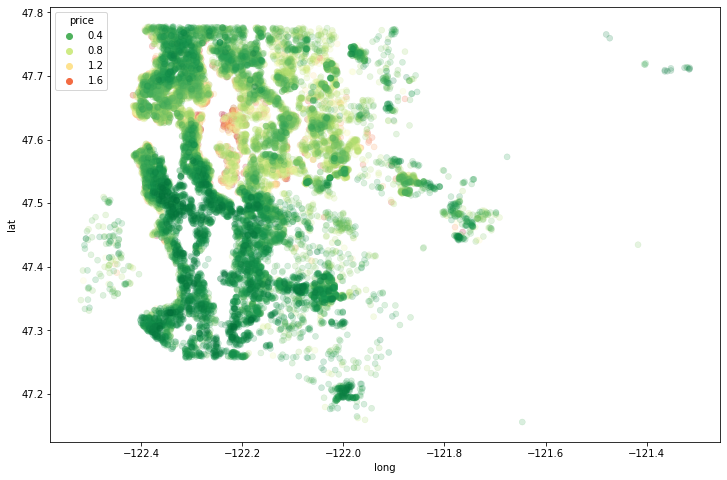

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df_noOutliers, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn_r')

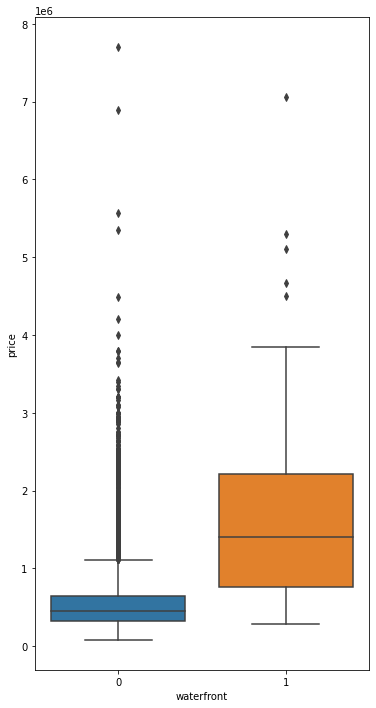

In [12]:
plt.figure(figsize=(6, 12))
sns.boxplot(x='waterfront', y='price', data=df)

# Data Preprocessing

In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
df.drop('id', inplace=True, axis=1)

In [15]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
df['date']=pd.to_datetime(df['date'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [17]:
df['month']=df['date'].apply(lambda x: x.month)
df['year']=df['date'].apply(lambda x: x.year)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


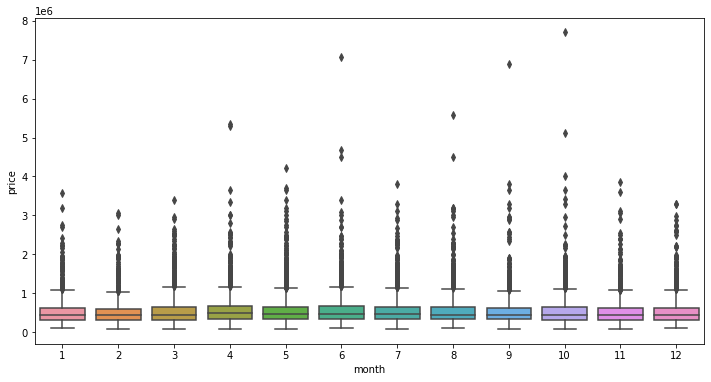

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='price', data=df)

In [19]:
df.groupby('month').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
month,,,,,,,,,,,,,,,,,,,,
1,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585,2015.000000
2,508520.051323,3.347233,2.062550,2012.901363,13694.825180,1.466319,0.004812,0.242181,3.405774,7.558140,1727.935846,284.965517,1971.418605,51.178027,98076.716119,47.546850,-122.216140,1944.269447,11595.312751,2015.000000
3,544057.683200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,1970.597333,82.976533,98077.578667,47.553377,-122.214041,1951.490133,12678.426133,2015.000000
4,562215.615074,3.367878,2.107896,2060.743831,14273.263795,1.495065,0.008524,0.230597,3.358905,7.651413,1777.883804,282.860027,1971.731270,70.733961,98078.967250,47.560614,-122.213484,1986.577389,12653.579632,2015.000000
5,550849.746893,3.363712,2.116508,2090.514913,16678.293289,1.486123,0.005385,0.239022,3.420464,7.674399,1780.695940,309.818973,1970.216653,105.121375,98079.094863,47.565075,-122.214854,1990.449876,13694.719553,2014.267606
6,557534.318182,3.421488,2.165863,2131.163912,14258.142792,1.512167,0.008724,0.241047,3.460514,7.736915,1820.423324,310.740588,1970.723600,80.617080,98079.596419,47.565513,-122.214423,2033.827824,12835.893939,2014.000000
7,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689,2014.000000
8,536655.212481,3.357401,2.123388,2085.100567,14643.078391,1.499484,0.006189,0.223311,3.440433,7.685921,1798.394533,286.706034,1972.044353,78.234141,98077.033522,47.564750,-122.209769,1995.968025,12966.646209,2014.000000
9,529723.517787,3.365330,2.133117,2079.319593,15365.775833,1.491248,0.008470,0.249012,3.431959,7.644833,1786.968379,292.351214,1970.534161,99.215697,98078.513834,47.560654,-122.213067,1983.068888,11887.396951,2014.000000


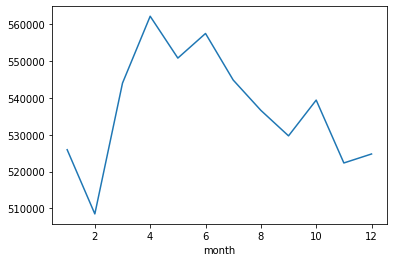

In [20]:
df.groupby('month').mean()['price'].plot()

In [21]:
df.drop('date', inplace=True, axis=1)
df.drop('zipcode', inplace=True, axis=1)
df.T

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
price,221900.0000,538000.000,180000.0000,604000.0000,510000.0000,1.230000e+06,257500.0000,291850.0000,229500.0000,323000.0000,...,507250.0000,429000.0000,610685.0000,1.010000e+06,475000.0000,360000.0000,400000.0000,402101.0000,400000.0000,325000.0000
bedrooms,3.0000,3.000,2.0000,4.0000,3.0000,4.000000e+00,3.0000,3.0000,3.0000,3.0000,...,3.0000,3.0000,4.0000,4.000000e+00,3.0000,3.0000,4.0000,2.0000,3.0000,2.0000
bathrooms,1.0000,2.250,1.0000,3.0000,2.0000,4.500000e+00,2.2500,1.5000,1.0000,2.5000,...,2.5000,2.0000,2.5000,3.500000e+00,2.5000,2.5000,2.5000,0.7500,2.5000,0.7500
sqft_living,1180.0000,2570.000,770.0000,1960.0000,1680.0000,5.420000e+03,1715.0000,1060.0000,1780.0000,1890.0000,...,2270.0000,1490.0000,2520.0000,3.510000e+03,1310.0000,1530.0000,2310.0000,1020.0000,1600.0000,1020.0000
sqft_lot,5650.0000,7242.000,10000.0000,5000.0000,8080.0000,1.019300e+05,6819.0000,9711.0000,7470.0000,6560.0000,...,5536.0000,1126.0000,6023.0000,7.200000e+03,1294.0000,1131.0000,5813.0000,1350.0000,2388.0000,1076.0000
floors,1.0000,2.000,1.0000,1.0000,1.0000,1.000000e+00,2.0000,1.0000,1.0000,2.0000,...,2.0000,3.0000,2.0000,2.000000e+00,2.0000,3.0000,2.0000,2.0000,2.0000,2.0000
waterfront,0.0000,0.000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
view,0.0000,0.000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
condition,3.0000,3.000,3.0000,5.0000,3.0000,3.000000e+00,3.0000,3.0000,3.0000,3.0000,...,3.0000,3.0000,3.0000,3.000000e+00,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000
grade,7.0000,7.000,6.0000,7.0000,8.0000,1.100000e+01,7.0000,7.0000,7.0000,7.0000,...,8.0000,8.0000,9.0000,9.000000e+00,8.0000,8.0000,8.0000,7.0000,8.0000,7.0000


## Train-Test Split

In [22]:
x=df.drop('price', axis=1).values
y=df['price'].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [24]:
scaler=MinMaxScaler()

In [25]:
x_train=scaler.fit_transform(x_train)

In [26]:
x_test=scaler.transform(x_test)

In [27]:
x_train.shape

(17277, 19)

## Creating the model

In [28]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [29]:
model.fit(x=x_train, y=y_train, 
          validation_data=(x_test, y_test), 
          batch_size=128, epochs=400
          )

Epoch 1/400
135/135 [==============================] - 4s 12ms/step - loss: 431747235840.0000 - val_loss: 407055106048.0000
Epoch 2/400
135/135 [==============================] - 1s 9ms/step - loss: 428608585728.0000 - val_loss: 396382830592.0000
Epoch 3/400
135/135 [==============================] - 1s 9ms/step - loss: 386531000320.0000 - val_loss: 305647419392.0000
Epoch 4/400
135/135 [==============================] - 1s 6ms/step - loss: 230794821632.0000 - val_loss: 121066749952.0000
Epoch 5/400
135/135 [==============================] - 1s 9ms/step - loss: 109729103872.0000 - val_loss: 86867329024.0000
Epoch 6/400
135/135 [==============================] - 1s 8ms/step - loss: 99903725568.0000 - val_loss: 85130231808.0000
Epoch 7/400
135/135 [==============================] - 1s 7ms/step - loss: 97833074688.0000 - val_loss: 83239862272.0000
Epoch 8/400
135/135 [==============================] - 1s 8ms/step - loss: 95734374400.0000 - val_loss: 81385545728.0000
Epoch 9/400
135/135 [=

In [30]:
losses=pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.317472e+11,4.070551e+11
1,4.286086e+11,3.963828e+11
2,3.865310e+11,3.056474e+11
3,2.307948e+11,1.210667e+11
4,1.097291e+11,8.686733e+10
...,...,...
395,2.796221e+10,2.463736e+10
396,2.794689e+10,2.454798e+10
397,2.792614e+10,2.461085e+10
398,2.795437e+10,2.451675e+10


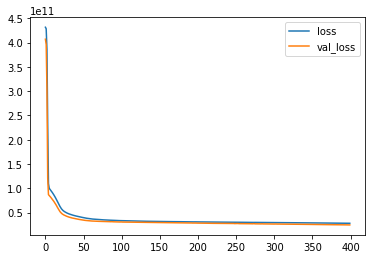

In [31]:
losses.plot()

In [32]:
predictions=model.predict(x_test)

In [33]:
print("Mean Squared Error :" + str(mean_squared_error(y_test, predictions)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_test, predictions))))

print("Mean Absolute Error : " + str(mean_absolute_error(y_test, predictions)))

print("Explained Variance Score : " + str(explained_variance_score(y_test, predictions)))

Mean Squared Error :24537530808.76266
Root Mean Squared Error : 156644.60031792562
Mean Absolute Error : 97363.32065972222
Explained Variance Score : 0.8003589304576498


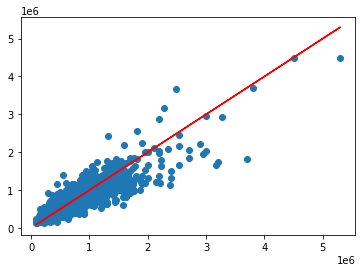

In [35]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

## Predicting the prices of a Single House

In [60]:
i=5
house_features=df.drop('price', axis=1).iloc[i]
house_features=scaler.transform(house_features.values.reshape(-1, 19))

In [61]:
print('The predicted price of the given house is $' + (str(model.predict(house_features)[0][0])) + '/-')

The predicted price of the given house is $1258272.8/-


In [62]:

print('The actual price of the given house is $' + (str(df['price'].iloc[i])) + '/-')

The actual price of the given house is $1230000.0/-
